In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from utils.util import *
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")
# sns.set_context("paper")
sns.set_context("talk")

In [9]:
def runs_to_df(runs_result, ratio_hidds):
    cong_train_accs, cong_test_accs = np.asarray(runs_result['cong_train_acc']), \
                                      np.asarray(runs_result['cong_test_acc'])
    incong_train_accs, incong_test_accs = np.asarray(runs_result['incong_train_acc']), \
                                          np.asarray(runs_result['incong_test_acc'])
    train_accs, test_accs = np.asarray(runs_result['train_acc']), np.asarray(runs_result['test_acc'])
    ratio_cong_incong_train = cong_train_accs / incong_train_accs
    ratio_cong_incong_test = cong_test_accs / incong_test_accs

    runs, checkpoints = train_accs.shape

    ratio_hidd = pd.DataFrame(ratio_hidds, columns=np.arange(checkpoints)) 
    ratio_hidd.insert(0, 'runs', np.arange(runs))
    df_ratio_hidds = pd.melt(ratio_hidd, id_vars=['runs'], var_name='Steps', value_name='Ratio(cong/incong)')
    df_ratio_hidds['Label'] = 'dist_hidds'

    ratio_tr = pd.DataFrame(ratio_cong_incong_train, columns=np.arange(checkpoints)) 
    ratio_tr.insert(0, 'runs', np.arange(runs))
    df_ratio_cong_incong_acc_tr = pd.melt(ratio_tr, id_vars=['runs'], var_name='Steps', value_name='Ratio(cong/incong)')
    df_ratio_cong_incong_acc_tr['Label'] = 'accs_train'

    ratio_ts = pd.DataFrame(ratio_cong_incong_test, columns=np.arange(checkpoints)) 
    ratio_ts.insert(0, 'runs', np.arange(runs))
    df_ratio_cong_incong_acc_ts = pd.melt(ratio_ts, id_vars=['runs'], var_name='Steps', value_name='Ratio(cong/incong)')
    df_ratio_cong_incong_acc_ts['Label'] = 'accs_test'

    tr = pd.DataFrame(train_accs, columns=np.arange(checkpoints)) 
    tr.insert(0, 'runs', np.arange(runs))
    df_train = pd.melt(tr, id_vars=['runs'], var_name='Steps', value_name='Ratio(cong/incong)')
    df_train['Label'] = 'train'

    ts = pd.DataFrame(test_accs, columns=np.arange(checkpoints)) 
    ts.insert(0, 'runs', np.arange(runs))
    df_test = pd.melt(ts, id_vars=['runs'], var_name='Steps', value_name='Ratio(cong/incong)')
    df_test['Label'] = 'test'

    cong_tr = pd.DataFrame(cong_train_accs, columns=np.arange(checkpoints)) 
    cong_tr.insert(0, 'runs', np.arange(runs))
    df_cong_train = pd.melt(cong_tr, id_vars=['runs'], var_name='Steps', value_name='Ratio(cong/incong)')
    df_cong_train['Label'] = 'cong_train'

    cong_ts = pd.DataFrame(cong_test_accs, columns=np.arange(checkpoints)) 
    cong_ts.insert(0, 'runs', np.arange(runs))
    df_cong_test = pd.melt(cong_ts, id_vars=['runs'], var_name='Steps', value_name='Ratio(cong/incong)')
    df_cong_test['Label'] = 'cong_test'

    incong_tr = pd.DataFrame(incong_train_accs, columns=np.arange(checkpoints)) 
    incong_tr.insert(0, 'runs', np.arange(runs))
    df_incong_train = pd.melt(incong_tr, id_vars=['runs'], var_name='Steps', value_name='Ratio(cong/incong)')
    df_incong_train['Label'] = 'incong_train'

    incong_ts = pd.DataFrame(incong_test_accs, columns=np.arange(checkpoints)) 
    incong_ts.insert(0, 'runs', np.arange(runs))
    df_incong_test = pd.melt(incong_ts, id_vars=['runs'], var_name='Steps', value_name='Ratio(cong/incong)')
    df_incong_test['Label'] = 'incong_test'
    
    dfs = df_train, df_test, df_cong_train, df_cong_test, df_incong_train,\
          df_incong_test, df_ratio_cong_incong_acc_tr, df_ratio_cong_incong_acc_ts, \
          df_ratio_hidds
    return dfs

def plot_accs(dfs, title, ax):
    df_train, df_test, df_cong_train,\
        df_cong_test, df_incong_train,\
        df_incong_test, df_ratio_cong_incong_acc_tr,\
        df_ratio_cong_incong_acc_ts, df_ratio_hidds = dfs
    # ax = sns.lineplot(data=df_train,
    #             x="Steps", y="Ratio(cong/incong)", hue="Label", style="Label",
    #             markers=True, dashes=False, err_style="bars", ci=68, palette=['orange'], ax=ax)
    # ax = sns.lineplot(data=df_test,
    #             x="Steps", y="Ratio(cong/incong)", hue="Label", style="Label",
    #             markers=True, dashes=False, err_style="bars", ci=68, ax=ax)
    ax = sns.lineplot(data=df_ratio_hidds,
                x="Steps", y="Ratio(cong/incong)", hue="Label", style="Label",
                markers=True, dashes=False, err_style="bars", ci=68, palette=['green'], ax=ax)
    ax = sns.lineplot(data=df_ratio_cong_incong_acc_tr,
                x="Steps", y="Ratio(cong/incong)", hue="Label", style="Label",
                markers=True, dashes=False, err_style="bars", ci=68, palette=['orange'], ax=ax)
    # ax = sns.lineplot(data=df_ratio_cong_incong_acc_ts,
    #             x="Steps", y="Ratio(cong/incong)", hue="Label", style="Label",
    #             markers=True, dashes=False, err_style="bars", ci=68, palette=['red'], ax=ax)
    # ax = sns.lineplot(data=df_incong_train,
    #             x="Steps", y="Ratio(cong/incong)", hue="Label", style="Label",
    #             markers=True, dashes=False, err_style="bars", ci=68, palette=['green'], ax=ax)
    # ax = sns.lineplot(data=df_incong_test,
    #             x="Steps", y="Ratio(cong/incong)", hue="Label", style="Label",
    #             markers=True, dashes=False, err_style="bars", ci=68, palette=['purple'], ax=ax)
                
    ax.set_title(title)
    return ax

In [10]:
ctx_order = 'first'
ctx_order_str = 'ctxF'
analyze_name1 = 'calc_ratio'
analyze_name2 = 'analyze_accs'

## Read ratio results

In [11]:
analyze_name = analyze_name1
with open('../../results/%s_results_mlp.P' %(analyze_name), 'rb') as f:
    mlp_results = pickle.load(f)

ctx_order_str = 'ctxF'
with open('../../results/%s_%s_results_rnn_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxF = pickle.load(f)
with open('../../results/%s_%s_results_rnncell_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxF = pickle.load(f)


ctx_order_str = 'ctxL'
with open('../../results/%s_%s_results_rnn_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxL = pickle.load(f)
with open('../../results/%s_%s_results_rnncell_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxL = pickle.load(f)


with open('../../results/%s_results_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_results = pickle.load(f)

with open('../../results/%s_results_truncated_stepwisemlp.P' %(analyze_name), 'rb') as f:
    trunc_swmlp_results = pickle.load(f)

In [12]:
mlp_runs      = dict_to_list(mlp_results, analyze_name)
rnn_ctxF_runs = dict_to_list(rnn_results_ctxF, analyze_name)
rnn_ctxL_runs = dict_to_list(rnn_results_ctxL, analyze_name)
rnncell_ctxF_runs  = dict_to_list(rnncell_results_ctxF, analyze_name)
rnncell_ctxL_runs  = dict_to_list(rnncell_results_ctxL, analyze_name)
swmlp_runs   = dict_to_list(swmlp_results, analyze_name)
trunc_swmlp_runs   = dict_to_list(trunc_swmlp_results, analyze_name)
mlp_runs.keys()

dict_keys(['ratio_embed', 'ratio_hidd'])

In [13]:
ratio_hidds_mlp          = np.asarray(mlp_runs['ratio_hidd'])
ratio_hidds_rnn_ctxF     = np.asarray(rnn_ctxF_runs['ratio_hidd'])
ratio_hidds_rnn_ctxL     = np.asarray(rnn_ctxL_runs['ratio_hidd'])
ratio_hidds_rnncell_ctxF = np.asarray(rnncell_ctxF_runs['ratio_hidd'])
ratio_hidds_rnncell_ctxL = np.asarray(rnncell_ctxL_runs['ratio_hidd'])
ratio_hidds_swmlp        = np.asarray(swmlp_runs['ratio_hidd'])
ratio_hidds_trunc_swmlp  = np.asarray(trunc_swmlp_runs['ratio_hidd'])
ratio_hidds_swmlp.shape

(20, 21, 2)

## Read Ratio(cong/incong) results

In [14]:
analyze_name = analyze_name2
with open('../../results/%s_results_mlp.P' %(analyze_name), 'rb') as f:
    mlp_results = pickle.load(f)

ctx_order_str = 'ctxF'
with open('../../results/%s_%s_results_rnn_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxF = pickle.load(f)
with open('../../results/%s_%s_results_rnncell_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxF = pickle.load(f)


ctx_order_str = 'ctxL'
with open('../../results/%s_%s_results_rnn_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxL = pickle.load(f)
with open('../../results/%s_%s_results_rnncell_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxL = pickle.load(f)


with open('../../results/%s_results_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_results = pickle.load(f)

with open('../../results/%s_results_truncated_stepwisemlp.P' %(analyze_name), 'rb') as f:
    trunc_swmlp_results = pickle.load(f)

In [15]:
mlp_runs      = dict_to_list(mlp_results, analyze_name)
rnn_ctxF_runs = dict_to_list(rnn_results_ctxF, analyze_name)
rnn_ctxL_runs = dict_to_list(rnn_results_ctxL, analyze_name)
rnncell_ctxF_runs  = dict_to_list(rnncell_results_ctxF, analyze_name)
rnncell_ctxL_runs  = dict_to_list(rnncell_results_ctxL, analyze_name)
swmlp_runs   = dict_to_list(swmlp_results, analyze_name)
trunc_swmlp_runs   = dict_to_list(trunc_swmlp_results, analyze_name)
mlp_runs.keys()

dict_keys(['train_acc', 'test_acc', 'cong_train_acc', 'incong_train_acc', 'cong_test_acc', 'incong_test_acc'])

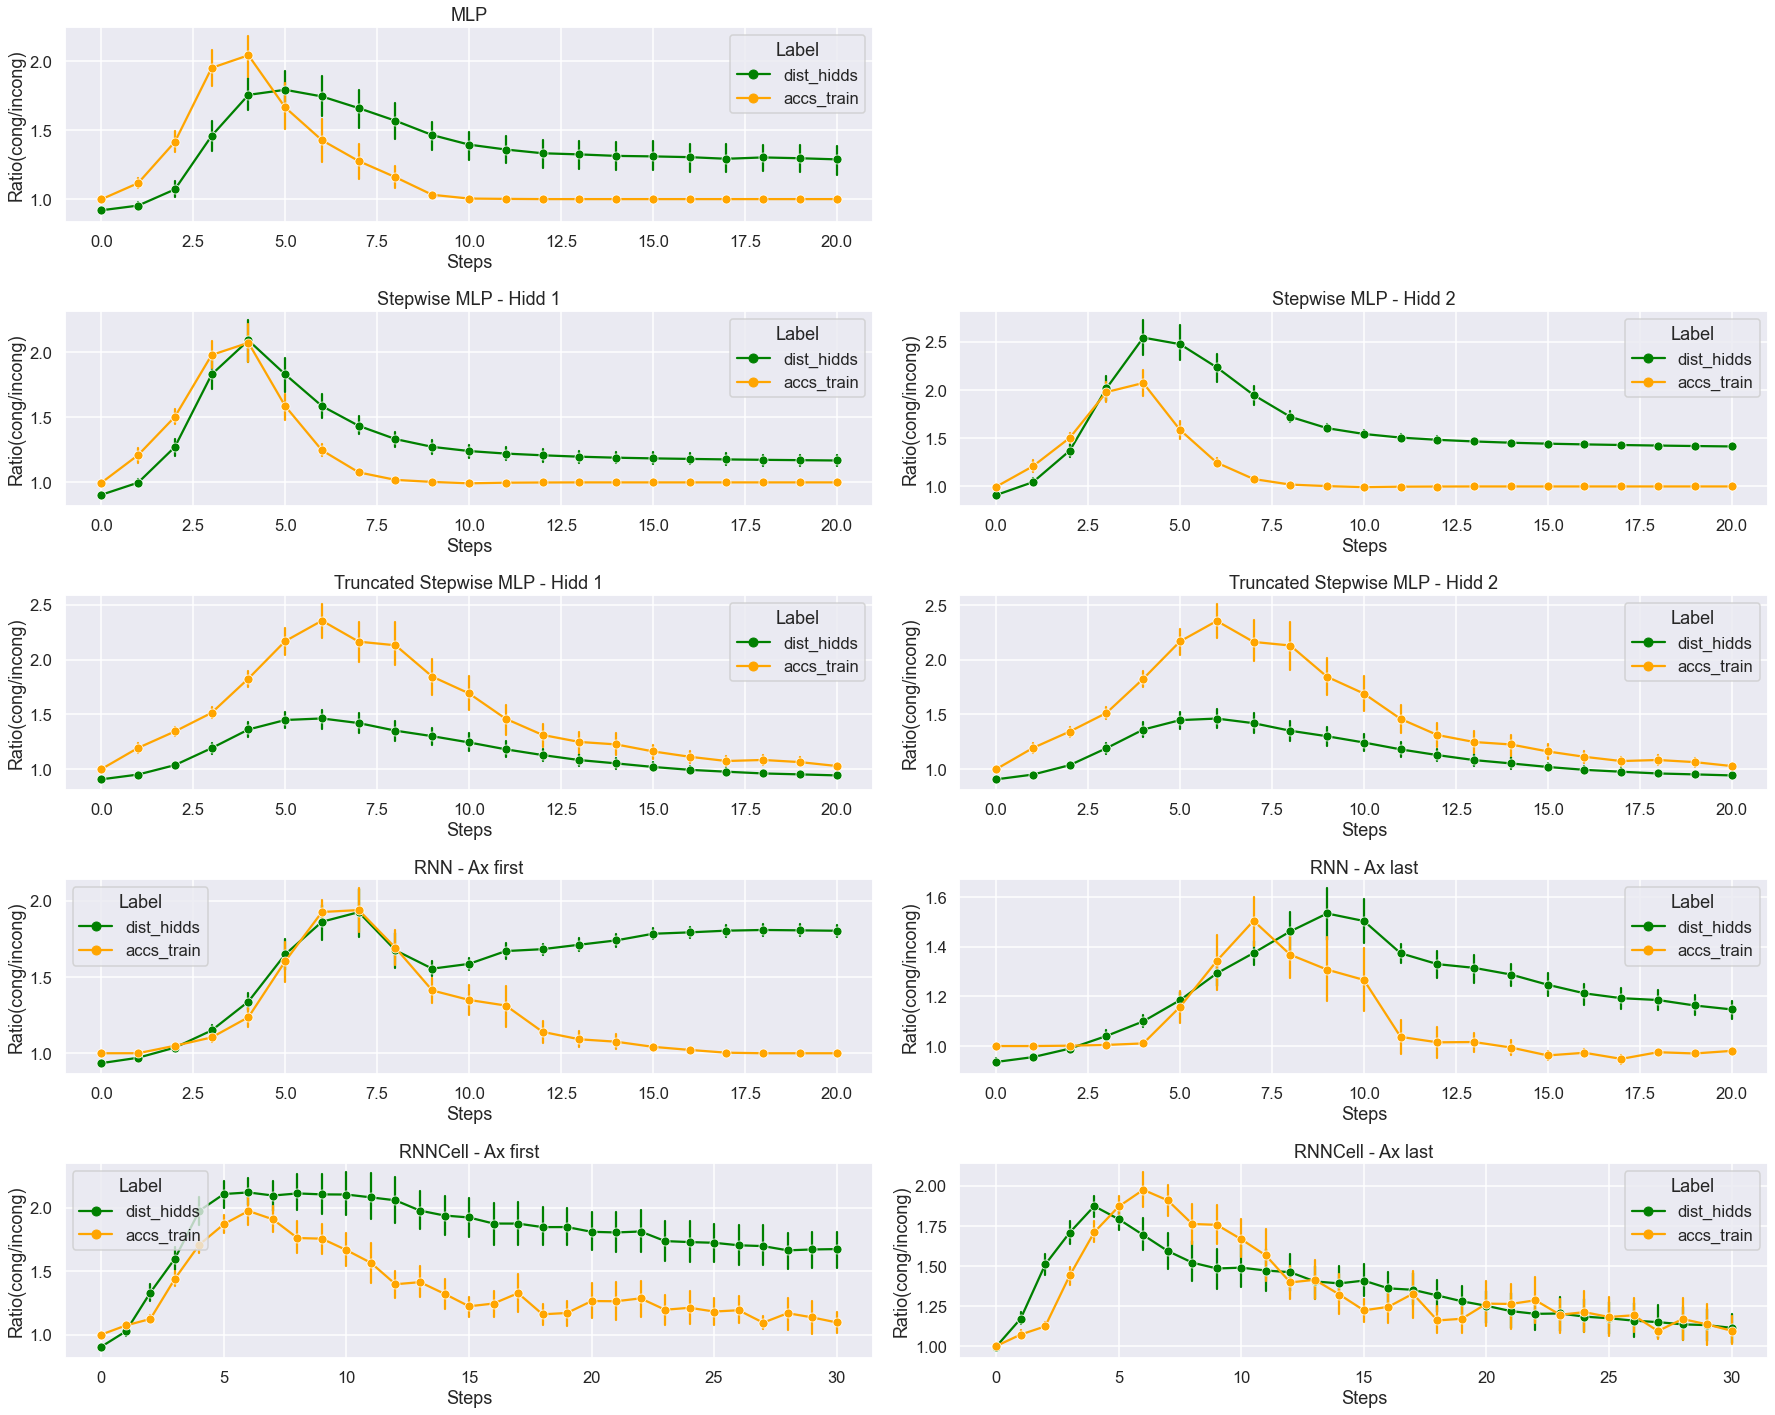

In [16]:
fig, axs = plt.subplots(5,2, figsize = [25, 20])

dfs = runs_to_df(mlp_runs, ratio_hidds_mlp)
ax = plot_accs(dfs, "MLP", axs[0][0])
fig.delaxes(axs[0][1])

dfs = runs_to_df(swmlp_runs, ratio_hidds_swmlp[:,:,0])
ax = plot_accs(dfs, "Stepwise MLP - Hidd 1", axs[1][0])

dfs = runs_to_df(swmlp_runs, ratio_hidds_swmlp[:,:,1])
ax = plot_accs(dfs, "Stepwise MLP - Hidd 2", axs[1][1])


dfs = runs_to_df(trunc_swmlp_runs, ratio_hidds_trunc_swmlp[:,:,0])
ax = plot_accs(dfs, "Truncated Stepwise MLP - Hidd 1", axs[2][0])

dfs = runs_to_df(trunc_swmlp_runs, ratio_hidds_trunc_swmlp[:,:,0])
ax = plot_accs(dfs, "Truncated Stepwise MLP - Hidd 2", axs[2][1])


ctx_order = 'first'
dfs = runs_to_df(rnn_ctxF_runs, ratio_hidds_rnn_ctxF)
ax = plot_accs(dfs, "RNN - Ax %s" %(ctx_order), axs[3][0])

dfs = runs_to_df(rnncell_ctxF_runs, ratio_hidds_rnncell_ctxF)
ax = plot_accs(dfs, "RNNCell - Ax %s" %(ctx_order), axs[4][0])

ctx_order = 'last'
dfs = runs_to_df(rnn_ctxL_runs, ratio_hidds_rnn_ctxL)
ax = plot_accs(dfs, "RNN - Ax %s" %(ctx_order), axs[3][1])

dfs = runs_to_df(rnncell_ctxL_runs, ratio_hidds_rnncell_ctxL)
ax = plot_accs(dfs, "RNNCell - Ax %s" %(ctx_order), axs[4][1])

plt.tight_layout()


fig_str = 'analyze_accs_cong_incong_ratio_results_all_models'
plt.tight_layout()
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
            bbox_inches = 'tight', pad_inches = 0)
fig.savefig(('../../figures/' + fig_str + '.png'), 
            bbox_inches = 'tight', pad_inches = 0)